In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [2]:
class SimpleDense(layers.Layer):
    def __init__(self,units=32,activation=None):
        super().__init__()
        self.units=units
        self.activation= tf.keras.activations.get(activation)

    def build(self,input_size):
        w_init=tf.random_normal_initializer()
        self.w=tf.Variable(initial_value=w_init(shape=(input_size[-1],self.units),dtype=tf.float32),trainable=True,name='kernel')
        b_init=tf.zeros_initializer()
        self.b=tf.Variable(initial_value=b_init(shape=(1,self.units),dtype=tf.float32),trainable=True,name='bias')

    def call(self,inputs):
        return self.activation(tf.matmul(inputs,self.w)+self.b)

In [3]:
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()
X_train=X_train/255
X_test=X_test/255
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)

In [4]:
def my_relu(t):
    return tf.maximum(t,0.0)

def my_softmax(t):
    return tf.exp(t)/tf.reduce_sum(tf.exp(t))

In [5]:
inputs=layers.Input(shape=(28,28))
x=layers.Flatten()(inputs)
x=SimpleDense(128,activation=lambda t:tf.maximum(t,0.0))(x)
x=SimpleDense(128,activation=lambda t:tf.maximum(t,0.0))(x)
outputs=SimpleDense(10,activation=lambda t:tf.exp(t)/tf.reduce_sum(tf.exp(t)))(x)
model=models.Model(inputs=inputs,outputs=outputs)

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
H=model.fit(X_train,Y_train,batch_size=32,validation_split=0.2,epochs=10)

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.5288 - accuracy: 0.8101 - val_loss: 0.4532 - val_accuracy: 0.8345
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3776 - accuracy: 0.8620 - val_loss: 0.3823 - val_accuracy: 0.8621
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3371 - accuracy: 0.8758 - val_loss: 0.3570 - val_accuracy: 0.8717
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3115 - accuracy: 0.8850 - val_loss: 0.3670 - val_accuracy: 0.8683
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2950 - accuracy: 0.8891 - val_loss: 0.3382 - val_accuracy: 0.8769
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2787 - accuracy: 0.8947 - val_loss: 0.3143 - val_accuracy: 0.8882
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2667 - accuracy: 0.8991 - val_loss: 0.3175 - val_accuracy:

Text(0.5, 1.0, 'SimpleDense Layer with Activation')

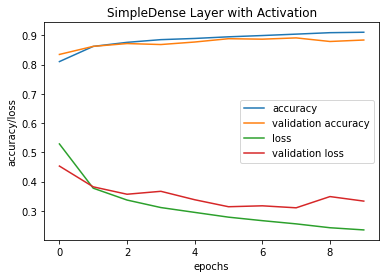

In [8]:
plt.plot(H.history['accuracy'],label='accuracy')
plt.plot(H.history['val_accuracy'],label='validation accuracy')
plt.plot(H.history['loss'],label='loss')
plt.plot(H.history['val_loss'],label='validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy/loss')
plt.title('SimpleDense Layer with Activation')